# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing**


In [ ]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import matplotlib.ticker as ticker


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# importing dataset and reading 
data = pd.read_csv('/content/drive/MyDrive/capstone 2/NYC Taxi Data.csv')


In [ ]:
# looking into shape of data set
data.shape

(1458644, 11)

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# All the columns in dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Information(datatype,columns,null/non-null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**Data Cleaning**

In [ ]:
# Describing the data
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
# missing values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

So, there is no null or missing values in our data set.

In [ ]:
# Let us check for unique values in columns.
print(data.nunique().sort_values())

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64


Text(0.5, 1.0, 'Descriptive Stats')

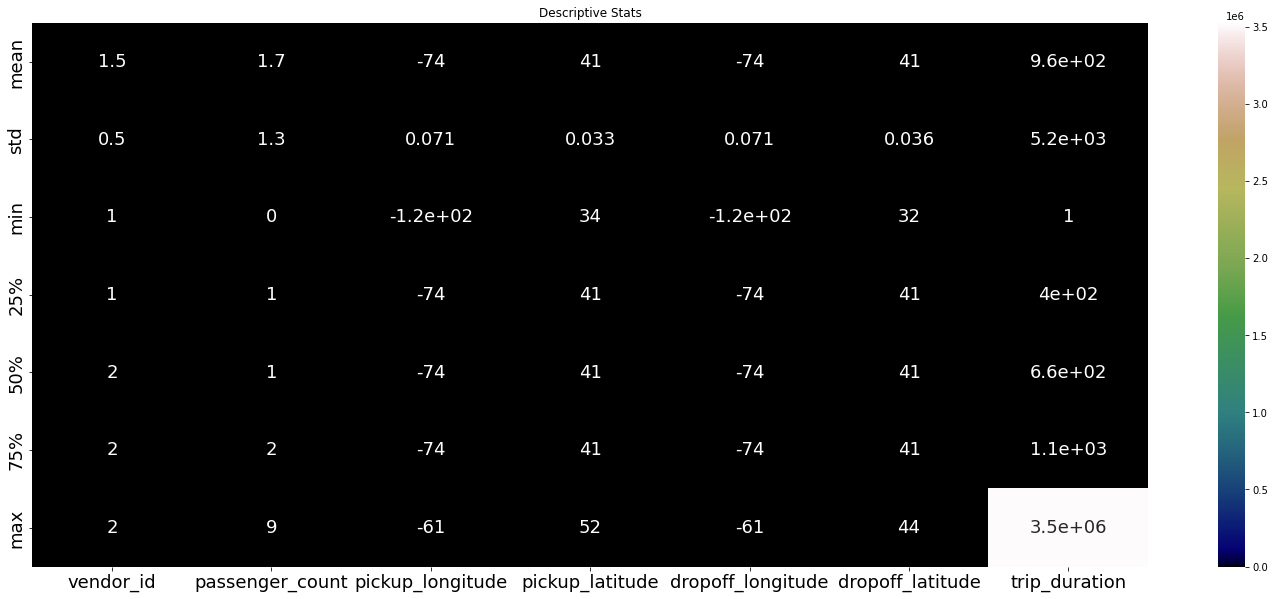

In [ ]:
#Descriptive Stats in visual form

plt.figure(figsize=(25,10))
svm = sns.heatmap(data.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)

plt.title('Descriptive Stats')

**Feature Creation and Engineering**

In [ ]:
# convert into datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
# extracting further information from datetime feature
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['dropoff_weekday']=data['dropoff_datetime'].dt.weekday

data['pickup_day']=data['pickup_datetime'].dt.day
data['dropoff_day']=data['dropoff_datetime'].dt.day

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

data['pickup_date'] = data['pickup_datetime'].dt.date

data['pickup_min'] = data['pickup_datetime'].dt.minute
data['dropoff_min'] = data['dropoff_datetime'].dt.minute


**Now let us apply this function and create new columns in the dataset.**

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_weekday,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_date,pickup_min,dropoff_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,14,14,3,3,17,17,2016-03-14,24,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,12,12,6,6,0,0,2016-06-12,43,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,19,19,1,1,11,12,2016-01-19,35,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,6,6,4,4,19,19,2016-04-06,32,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,26,26,3,3,13,13,2016-03-26,30,38


**Feature Engineering - Total Distance Travelled**

In [ ]:
#Importing the library which lets us calculate distance from geographical coordinates
from geopy.distance import great_circle

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates.


def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
#Calculate distance and assign new column to the dataframe.

data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_date,pickup_min,dropoff_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,14,14,3,3,17,17,2016-03-14,24,32,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,12,12,6,6,0,0,2016-06-12,43,54,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,19,19,1,1,11,12,2016-01-19,35,10,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,6,6,4,4,19,19,2016-04-06,32,39,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,26,26,3,3,13,13,2016-03-26,30,38,1.188590


In [ ]:
#Check the type of each variable
data.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


**EDA & Data Preprocessing**

Text(0.5, 1.0, 'distribution of passenger count')

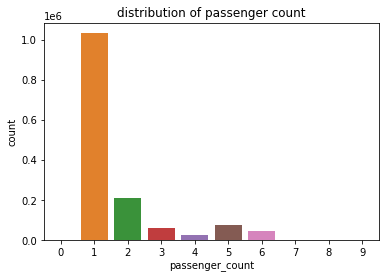

In [ ]:
#Passenger count
ax=sns.countplot(x= data['passenger_count'])
plt.title('distribution of passenger count')

In [ ]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Highest amount of trips are with 1 passenger

In [ ]:
# Let us remove the rows  0, 7 ,8 and 9 passenger count.
data = data[data['passenger_count'] > 0]
data = data[data['passenger_count'] <= 6]

data.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Vendor ID')

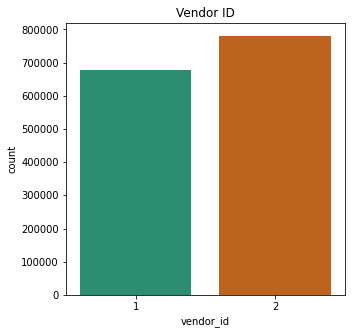

In [ ]:
#vendor_id - a code indicating the provider associated with the trip record
plt.figure(figsize=(5,5))
sns.countplot(data['vendor_id'], palette='Dark2')

plt.title("Vendor ID")

From Above Visualization, we can say that there are 2 vendors (Service Providers) and
2nd Service provider is the most opted one by New Yorkers.

Text(0.5, 1.0, 'store_and_fwd_flag')

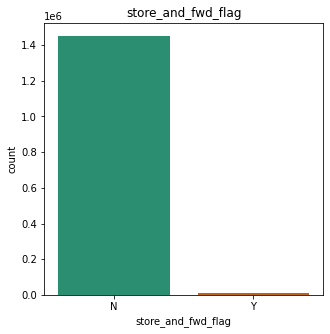

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data['store_and_fwd_flag'], palette='Dark2')
plt.title("store_and_fwd_flag")

In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1450537
Y       8042
Name: store_and_fwd_flag, dtype: int64

The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.


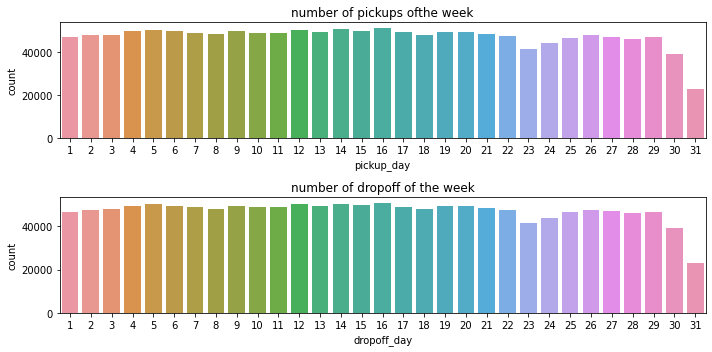

In [ ]:
# Count of pickups and dropoff of the weeks
figure, ax =plt.subplots(nrows= 2, ncols= 1, figsize=(10,5))
sns.countplot(x='pickup_day', data = data, ax= ax[0])
ax[0].set_title('number of pickups ofthe week')
sns.countplot(x='dropoff_day', data =data,ax=ax[1])
ax[1].set_title('number of dropoff of the week')
plt.tight_layout()

In [ ]:
# Encoding
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data['store_and_fwd_flag'] = enc.fit_transform(data['store_and_fwd_flag'])
data['vendor_id'] = enc.fit_transform(data['vendor_id'])

**Target Variable - Trip duration**

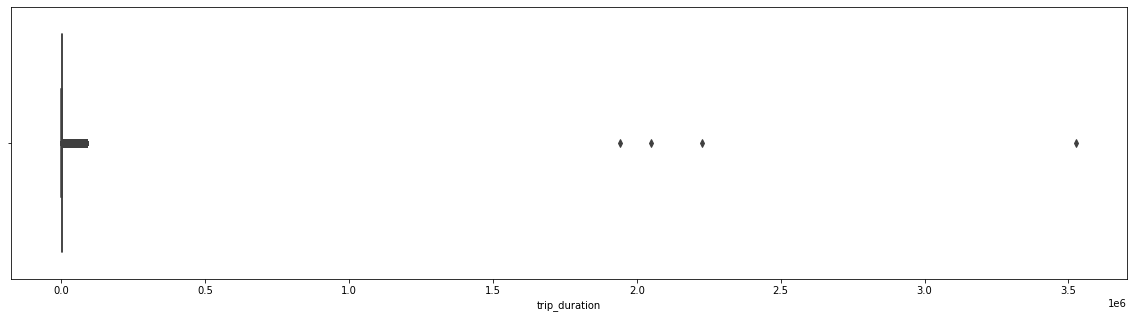

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data['trip_duration'])

It’s Quite suspicious. We’ll have to get rid of those Outliers

In [ ]:
 #lets see trip duration column in descending order
data['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
207497           1
726971           1
761666           1
35196            1
1125014          1
Name: trip_duration, Length: 1458579, dtype: int64

We can see that there is some entries which is significantly different from others.

As there is this 4 rows only, let us drop this rows

In [ ]:
#Dropping these 4 rows

data.drop(data[data['trip_duration'] == 3526282].index, inplace = True)
data.drop(data[data['trip_duration'] == 2227612].index, inplace = True)
data.drop(data[data['trip_duration'] == 2049578].index, inplace = True)
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)


In [ ]:
data.shape

(1458575, 23)

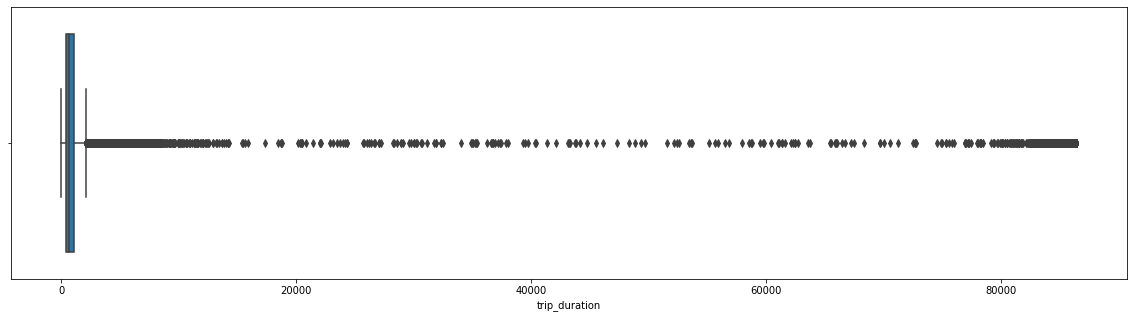

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data['trip_duration'])

**Distance**

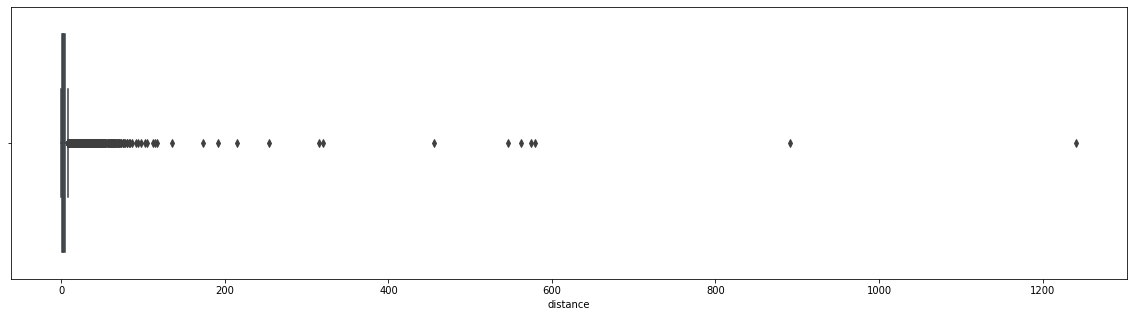

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(data.distance)
plt.show()

In [ ]:
print("There are {} trip records with 0 km distance".format(data.distance[data.distance == 0 ].count()))

There are 5887 trip records with 0 km distance


In [ ]:
data[data.distance == 0 ].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_date,pickup_min,dropoff_min,distance
246,id3487442,1,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,0,...,29,29,2,2,18,18,2016-02-29,39,42,0.0
291,id0924324,1,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,0,...,10,10,5,5,18,18,2016-05-10,7,26,0.0
407,id1145809,1,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,0,...,16,16,5,5,23,23,2016-05-16,15,31,0.0
702,id3499387,0,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,0,...,25,25,1,1,19,19,2016-01-25,45,54,0.0
1620,id0753277,0,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,0,...,27,27,1,1,22,22,2016-01-27,29,29,0.0


Text(0, 0.5, 'Counts')

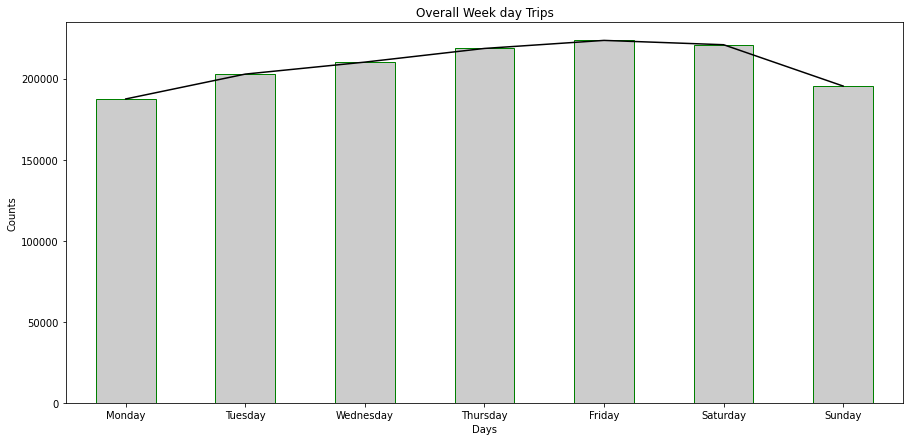

In [ ]:
#Analyzing week day trips

plt.figure(figsize=(15,7))
pickup_week = data['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar',edgecolor='green',color = '0.8')
pickup_week.sort_index().plot(kind='line',color = 'black')

plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.title('Overall Week day Trips')
plt.xlabel('Days')
plt.ylabel('Counts')

Observations tells us that Fridays and Saturdays are those days in a week when New Yorkers prefer to rome in the city. GREAT !

**Trips per month**

In [ ]:
sorted(data['pickup_month'].unique())

[1, 2, 3, 4, 5, 6]

Text(0.5, 1.0, 'Overall Monthly trips')

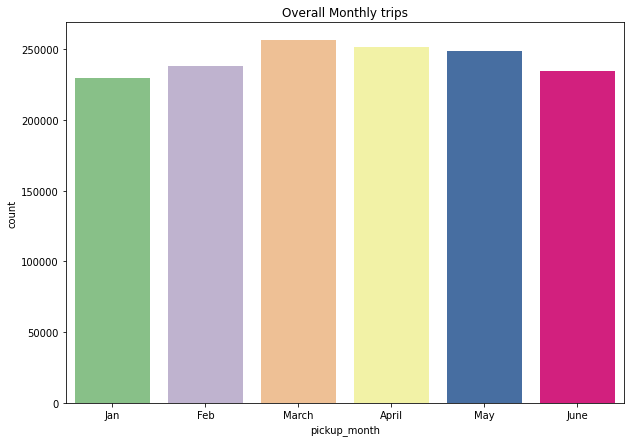

In [ ]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(data['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.title('Overall Monthly trips')

January being lowest probably due to extreme SnowFall NYC

**correlation**

In [ ]:
# correlation 
data.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_min,dropoff_min,distance
vendor_id,1.000000,0.287421,0.007825,0.001729,0.001523,0.004486,-0.079860,0.035785,0.001310,0.001370,0.000724,0.000756,-0.006224,-0.006203,0.009306,0.009259,-0.000391,-0.000244,0.008122
passenger_count,0.287421,1.000000,0.002166,-0.005141,-0.000350,-0.002773,-0.021788,0.014739,0.025199,0.025395,0.002002,0.002107,-0.002167,-0.002170,0.009090,0.008435,0.000967,-0.000048,0.010290
pickup_longitude,0.007825,0.002166,1.000000,0.022608,0.783577,0.100217,0.010804,0.040418,-0.016363,-0.017166,-0.000877,-0.000975,0.004474,0.004515,0.010151,0.010756,-0.002603,-0.001367,0.259789
pickup_latitude,0.001729,-0.005141,0.022608,1.000000,0.114919,0.493997,-0.008285,-0.044114,-0.028972,-0.029171,-0.006515,-0.006521,-0.001448,-0.001513,0.010596,0.017040,0.001418,0.001043,-0.210370
dropoff_longitude,0.001523,-0.000350,0.783577,0.114919,1.000000,0.124899,0.008230,0.024307,-0.001138,-0.001090,-0.000463,-0.000547,0.004749,0.004786,-0.022462,-0.023366,-0.002608,-0.001990,0.134059
dropoff_latitude,0.004486,-0.002773,0.100217,0.493997,0.124899,1.000000,-0.009874,-0.034100,-0.021753,-0.022120,-0.005581,-0.005581,-0.000608,-0.000652,0.013604,0.017237,0.001952,0.000525,-0.142149
store_and_fwd_flag,-0.079860,-0.021788,0.010804,-0.008285,0.008230,-0.009874,1.000000,0.003015,-0.003956,-0.003849,0.001101,0.001088,0.000383,0.000384,0.002284,0.002971,0.000203,0.000272,0.026292
trip_duration,0.035785,0.014739,0.040418,-0.044114,0.024307,-0.034100,0.003015,1.000000,-0.001392,-0.003482,0.002386,0.002064,0.013324,0.014103,0.005969,0.004861,-0.004122,-0.005042,0.151961
pickup_weekday,0.001310,0.025199,-0.016363,-0.028972,-0.001138,-0.021753,-0.003956,-0.001392,1.000000,0.993769,0.004364,0.004399,-0.014542,-0.014521,-0.084253,-0.088233,0.000785,-0.001316,0.007609
dropoff_weekday,0.001370,0.025395,-0.017166,-0.029171,-0.001090,-0.022120,-0.003849,-0.003482,0.993769,1.000000,0.004236,0.004315,-0.014269,-0.014214,-0.080831,-0.092484,0.003163,-0.003745,0.007998


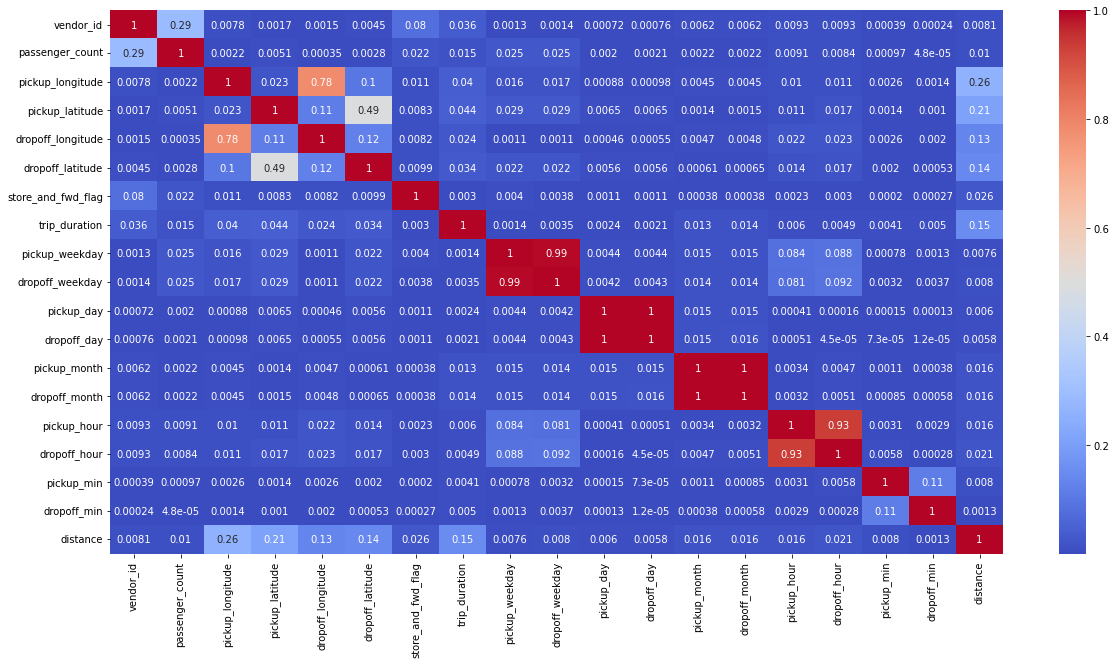

In [ ]:
plt.figure(figsize=(20,10))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Bivariate Analysis with Target Variable**

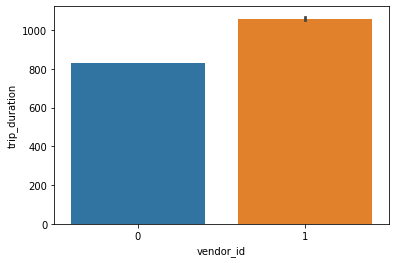

In [ ]:
# Trip duration according to vendor id
sns.barplot(x='vendor_id',y='trip_duration',data=data)

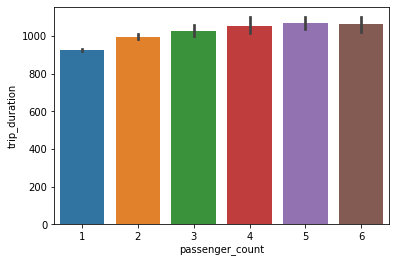

In [ ]:
# Trip Duration per hour
sns.barplot(y='trip_duration',x='passenger_count',data=data)

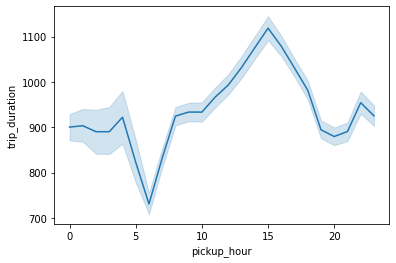

In [ ]:
# Trip Duration per time of day
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

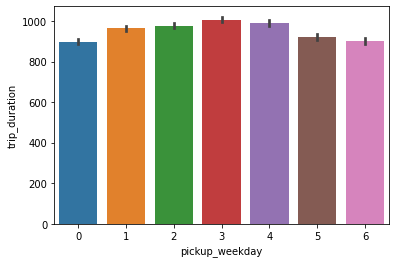

In [ ]:
# Trip Duration per Day of Week
sns.barplot(x='pickup_weekday',y='trip_duration',data=data)

Trip duration is the longest on Thursdays closely followed by Fridays

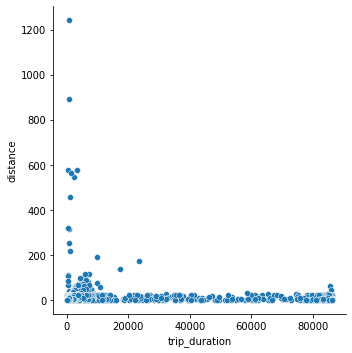

In [ ]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

**Multivariate Analysis**

Text(0.5, 1.0, 'correlation plot')

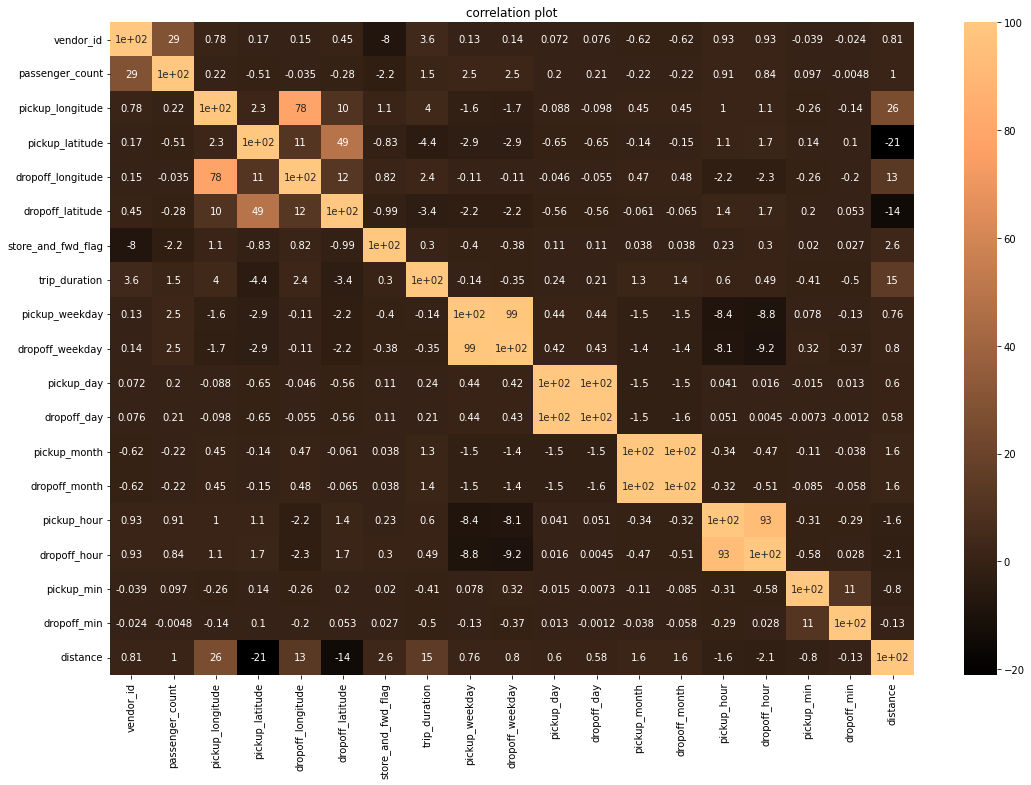

In [ ]:
# plotting pearson correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(data.corr()*100,annot=True,cmap='copper')
plt.title('correlation plot')

**Implementation**

In [ ]:
data.drop(columns=['id','pickup_datetime','pickup_date','dropoff_datetime','distance'],axis = 1,inplace=True)

In [ ]:
data.head()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_min,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,0,14,14,3,3,17,17,24,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,12,12,6,6,0,0,43,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,19,19,1,1,11,12,35,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,2,6,6,4,4,19,19,32,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,5,26,26,3,3,13,13,30,38


In [ ]:

data.shape

(1458575, 18)

Normalizing the Dataset using Standard Scaling Technique.

In [ ]:
#Predictors and Target Variable
# dividing the data into dependent and independent variables
X = data.drop(['trip_duration'], axis=1)
y = np.log(data['trip_duration'])

In [ ]:
# scaling predictors and creating new dataframe
from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_weekday', 'dropoff_weekday', 'pickup_day', 'dropoff_day',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_min', 'dropoff_min'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X.shape

(1458575, 17)

In [ ]:
X = pd.DataFrame(X, columns=cols)
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_min,dropoff_min
0,0.932376,-0.505698,-0.122246,0.517488,0.124378,0.384565,-0.074459,-1.561057,-1.561081,-0.172829,-0.172879,-0.307453,-0.307634,0.530258,0.524555,-0.322670,0.136133
1,-1.072528,-0.505698,-0.097712,-0.375858,-0.368965,-0.575340,-0.074459,1.509521,1.505478,-0.402632,-0.402682,1.477163,1.476791,-2.126171,-2.097458,0.774026,1.399030
2,0.932376,-0.505698,-0.078128,0.395900,-0.451801,-1.162274,-0.074459,-1.049294,-1.049988,0.401676,0.401628,-1.497197,-1.497250,-0.407305,-0.246625,0.312259,-1.126764
3,0.932376,-0.505698,-0.515547,-0.941334,-0.549973,-1.256128,-0.074459,-0.537531,-0.538895,-1.092039,-1.092091,0.287419,0.287175,0.842779,0.833027,0.139097,0.537964
4,0.932376,-0.505698,0.006128,1.286113,0.006982,0.855961,-0.074459,0.997758,0.994385,1.205984,1.205938,-0.307453,-0.307634,-0.094784,-0.092389,0.023655,0.480560


In [ ]:
#train test split
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021002, 17), (437573, 17), (1021002,), (437573,))

In [ ]:
#implenting linear regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_pred

array([6.56033356, 6.81841947, 6.30186823, ..., 6.47534896, 6.38177143,
       6.39190541])

In [ ]:
# Intercept
lin_reg.intercept_

6.464564523731725

In [ ]:
# Coefficient
lin_reg.coef_

array([ 3.94900490e-03,  1.19894711e-02,  7.35255306e-02, -6.89023632e-02,
       -6.98441069e-03, -5.75382533e-02,  9.81949992e-03, -6.82821644e-02,
        4.75596832e-02, -6.56118744e+01,  6.56194938e+01, -3.84193624e+02,
        3.84268005e+02, -2.00860516e+00,  2.06456308e+00, -9.66869806e-02,
        9.13487143e-02])

In [ ]:
#Examining metrics

print ("Training Score : " , lin_reg.score(X_train, y_train))

print ("Validation Score : ", lin_reg.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(lin_reg, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lin_reg_pred, y_test))

#print ("RMSE : ", np.sqrt(mean_squared_log_error(lin_reg_pred, y_test)))

Training Score :  0.17163540948539036
Validation Score :  0.18302715748664866
Cross Validation Score :  0.1668842356005239
R2_Score :  -3.887984789148481


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

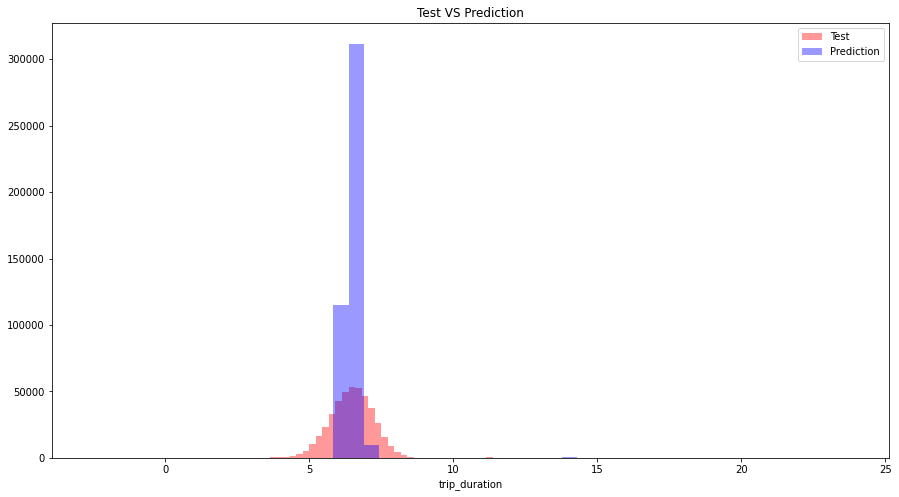

In [ ]:
#prediction vs validation data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="red", label="Test")

plt.subplot(1,1,1)
sns.distplot(lin_reg_pred, kde=False, color="blue", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

**Linear rergression**

**Null RMSLE**

In [ ]:
#null rmsle implementation

y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.1152710192646979


Implementing Decision tree

In [ ]:
# Decision Tree
#Decision tree implementation

from sklearn.tree import DecisionTreeRegressor

dec_t = DecisionTreeRegressor(criterion="mse", max_depth=10)
dec_t.fit(X_train, y_train)
dec_t_pred = dec_t.predict(X_test)
dec_t_pred


array([7.02150018, 7.97429517, 5.96301934, ..., 6.14519605, 6.71192339,
       5.96301934])

In [ ]:
#Examining metrics

print ("Training Score : " , dec_t.score(X_train, y_train))

print ("Validation Score : ", dec_t.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(dec_t, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dec_t_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(dec_t_pred, y_test)))

Training Score :  0.4677186240240401
Validation Score :  0.4587904390036911
Cross Validation Score :  0.4514480448342759
R2_Score :  -0.1634028847078388
RMSE :  0.08845545018193628


This time our decision tree model is not trained well as we can identify from scores, training score and cross validation score is close to 0.45 compared to last model where it was around 0.91.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

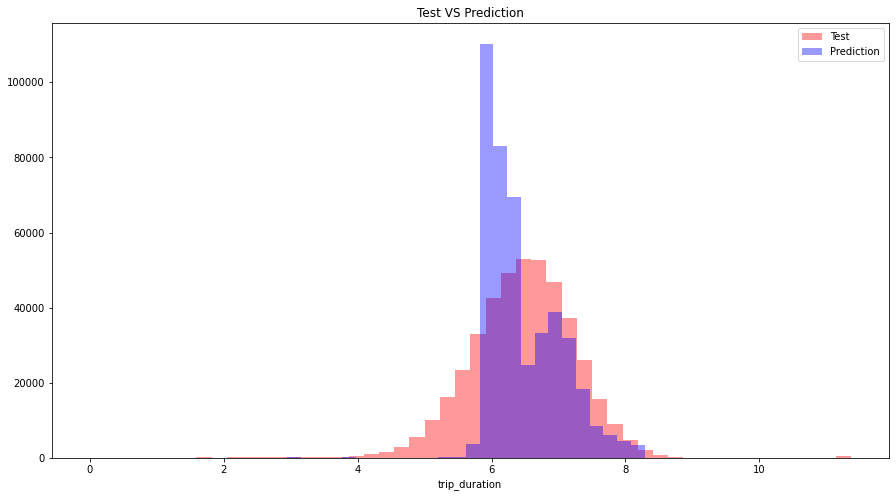

In [ ]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="red", label="Test")

plt.subplot(1,1,1)
sns.distplot(dec_t_pred, kde=False, color="blue", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

**Random forest**

In [ ]:
#implementation of forest algorithm

from sklearn.ensemble import RandomForestRegressor

ran_f = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
ran_f.fit(X_train, y_train)
ran_f_pred = ran_f.predict(X_test)
ran_f_pred

array([7.03445035, 7.99533672, 5.9675851 , ..., 6.20479554, 6.59447172,
       5.9675851 ])

In [ ]:
#examining metrics

print ("Training Score : " , ran_f.score(X_train, y_train))

print ("Validation Score : ", ran_f.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(ran_f, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(ran_f_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(ran_f_pred, y_test)))

Training Score :  0.47928331319961337
Validation Score :  0.47121999682389104
Cross Validation Score :  0.4710342746910142
R2_Score :  -0.20551862738826854
RMSE :  0.08763242712833773


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

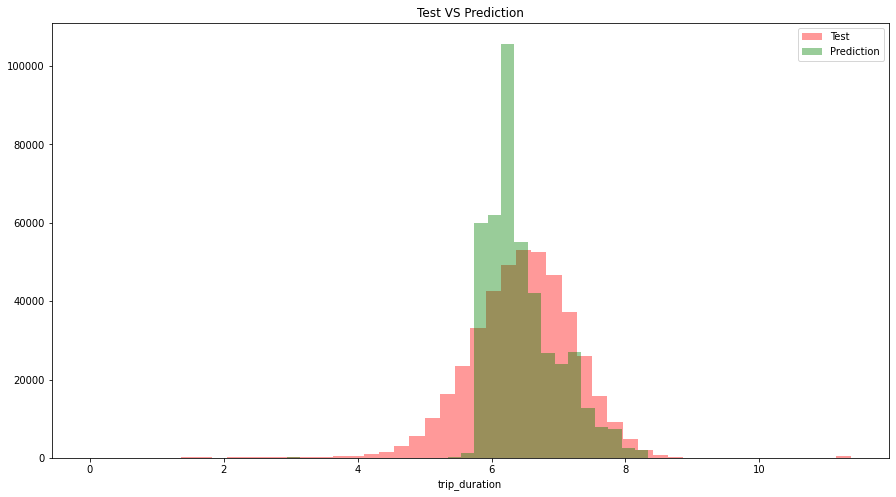

In [ ]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="red", label="Test")

plt.subplot(1,1,1)
sns.distplot(ran_f_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [ ]:
params = {'max_depth':[10,11,12,None], "min_samples_split":[2,3,4,5], 'max_features':[2,5,7,10]}

grid_1 = GridSearchCV(ran_f, params, cv=5)
grid_1.fit(X_train, y_train)
grid_pred_1 = grid_1.predict(X_test)
print (grid_pred_1)
grid_1.best_params_

[7.09173428 8.2239494  5.48554545 ... 5.45946176 6.75167222 6.00530046]


{'max_depth': None, 'max_features': 10, 'min_samples_split': 5}

Tuning with decision tree

In [ ]:
params = {'max_depth':[10,11,12,None], "min_samples_split":[2,3,4,5], 'max_features':[2,5,7,10]}

grid = GridSearchCV(dec_t, params, cv=5)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print (grid_pred)
grid.best_params_

[6.96625146 8.06642709 5.65935716 ... 4.18965474 6.76080872 5.85105423]


{'max_depth': None, 'max_features': 10, 'min_samples_split': 5}

In [ ]:
print ("Training Score : " , grid.score(X_train, y_train))

print ("Validation Score : ", grid.score(X_test, y_test))

print ("R2_Score after parameter tuning : ", r2_score(grid_pred, y_test))

print ("RMSE after parameter tuning : ", np.sqrt(mean_squared_log_error(grid_pred, y_test)))

Training Score :  0.9674069459788612
Validation Score :  0.5064076991531361
R2_Score after parameter tuning :  0.4995722628291994
RMSE after parameter tuning :  0.08714066439006571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

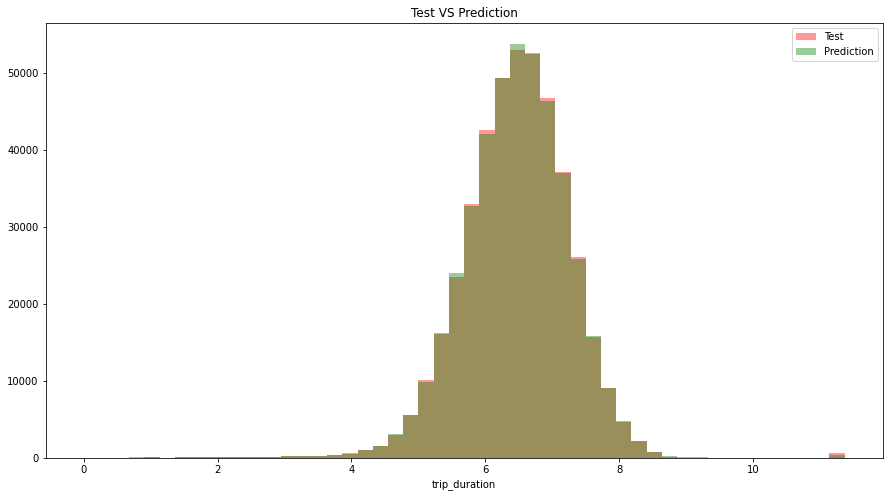

In [ ]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="red", label="Test")

plt.subplot(1,1,1)
sns.distplot(grid_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x648 with 0 Axes>

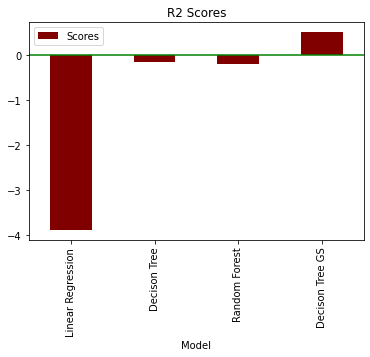

In [ ]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,9))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lin_reg_pred, y_test), r2_score(dec_t_pred, y_test), r2_score(ran_f_pred, y_test),r2_score(grid_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest','Decison Tree GS'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")